<a href="https://colab.research.google.com/github/RodrigoFD03/SeriesDeTiempo_RFD_A01383352/blob/main/Sesion2_RFD_A01383352.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo
## Rodrigo Fuentes Dávila / A01383352
### Sesión 2 - 17 feb 2023

Crea una lista que contenga los integrantes de tu famila

In [1]:
mifamilia= ['Javier', 'Paloma', 'Gerardo', 'Eugenio', "David"]

Vamos a elegir el integrante 1, *Nota: python comienza a contar desde cero*

In [4]:
mifamilia[0]

'Javier'

creamos una lista que contenga números

In [5]:
numeros = [6, 12, 9, 24, 1, 17]

In [7]:
type(numeros)

list

importamos un par de librerias/módulos. Que nos ayudaran a manejar números

In [6]:
import numpy as np
import pandas as pd

Calcularemos la media de estos números y los ordenaremos

In [8]:
# primero convertimos estos numeros en arreglo
numeros = np.array(numeros)

In [9]:
type(numeros)

numpy.ndarray

In [11]:
#calculamos la media y redondeamos a un decimal
numeros.mean().round(1)

11.5

In [12]:
#ordenamos los números con .sort()
numeros.sort()

In [13]:
numeros

array([ 1,  6,  9, 12, 17, 24])

In [18]:
#mostramos los números
numeros.var().round(2)

55.58

In [16]:
numeros

array([ 1,  6,  9, 12, 17, 24])

Pandas utiliza una estructura de datos llamada **DataFrames**, que no son otra cosa que datos organizados en filas y columnas

In [19]:
##creamos un diccionario 
dic_grupo = {'nombre':['Juan','Ale', 'Jime', 'David'], 
             'Edad':[23,14,28,18],
             'calificación':[90,70,45,85]}

In [20]:
##vemos su contenido
dic_grupo

{'nombre': ['Juan', 'Ale', 'Jime', 'David'],
 'Edad': [23, 14, 28, 18],
 'calificación': [90, 70, 45, 85]}

In [26]:
## ahora lo convertimos en DataFrame con pandas
grupox = pd.DataFrame(dic_grupo)

In [27]:
# ahora vemos el dataframe
grupox

,nombre,Edad,calificación
0,Juan,23,90
1,Ale,14,70
2,Jime,28,45
3,David,18,85


In [28]:
# El nombre de las columnas se llama columns
grupox.columns

Index(['nombre', 'Edad', 'calificación'], dtype='object')

In [30]:
# el nombre de las filas se llama Index
grupox.index

RangeIndex(start=0, stop=4, step=1)

In [32]:
# vemos su estructura con shape
grupox.shape

(4, 3)

In [33]:
# seleccionamos la columna nombre
grupox["nombre"]

0     Juan
1      Ale
2     Jime
3    David
Name: nombre, dtype: object

In [34]:
# seleccionamos la columna Edad
grupox['Edad']

0    23
1    14
2    28
3    18
Name: Edad, dtype: int64

In [39]:
# seleccionamos la columna edad y la columna nombre
grupox[["nombre", "Edad"]]

,nombre,Edad
0,Juan,23
1,Ale,14
2,Jime,28
3,David,18


## Repaso de inferencia

Vamos a instalar yahoo finance para descargar precio de las acciones  

In [ ]:
pip install yfinance

ya instalada la libreria, podemos decirle a python que la use

In [41]:
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

ahora importamos los datos de las acciones de walmart de México

In [42]:
walmex = yf.download('WALMEX.MX', 
                       start='2018-01-01', 
                       end='2022-12-31',
                       progress=False)

damos una mirada rápida a lo que contiene este dataframe con .head()

In [43]:
walmex.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,48.150002,48.590000,47.700001,48.029999,44.102348,8781274
2018-01-03,47.910000,48.000000,47.380001,47.590000,43.698330,12656360
2018-01-04,47.599998,48.209999,47.490002,47.610001,43.716702,16650871
2018-01-05,47.700001,48.169998,47.549999,48.090000,44.157448,9575059
2018-01-08,48.099998,48.500000,47.980000,48.320000,44.368641,13856218


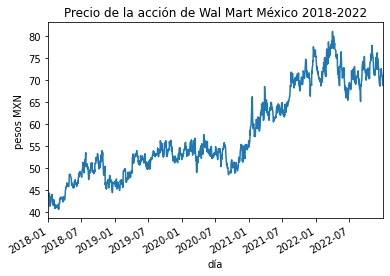

In [47]:
walmex["Adj Close"].plot()
plt.title("Precio de la acción de Wal Mart México 2018-2022")
plt.ylabel("pesos MXN")
plt.xlabel("día")
plt.xlim("2018-01-01", "2022-12-31")
plt.show()

Grafiquemos el precio de las acciones de walmex

Vamos a renombrar Adj Close

In [48]:
walmex = walmex.rename(columns={"Adj Close" : "adj_close"} )

In [49]:
walmex

,Open,High,Low,Close,adj_close,Volume
Date,,,,,,
2018-01-02,48.150002,48.590000,47.700001,48.029999,44.102348,8781274
2018-01-03,47.910000,48.000000,47.380001,47.590000,43.698330,12656360
2018-01-04,47.599998,48.209999,47.490002,47.610001,43.716702,16650871
2018-01-05,47.700001,48.169998,47.549999,48.090000,44.157448,9575059
2018-01-08,48.099998,48.500000,47.980000,48.320000,44.368641,13856218
...,...,...,...,...,...,...
2022-12-26,71.449997,71.529999,71.000000,71.099998,71.099998,444593
2022-12-27,71.370003,71.820000,70.910004,71.029999,71.029999,3352276
2022-12-28,70.910004,71.540001,69.919998,70.000000,70.000000,4871798


In [51]:
walmex["adj_close"].mean().round(2)

58.01

Vamos a calcular los return (rendimiento) de las acciones de walmart, usando .pct_change() de pandas

In [52]:
walmex["return"] = walmex["adj_close"].pct_change()

Vamos a ver su histograma

In [53]:
walmex.head()

,Open,High,Low,Close,adj_close,Volume,return
Date,,,,,,,
2018-01-02,48.150002,48.590000,47.700001,48.029999,44.102348,8781274,NaN
2018-01-03,47.910000,48.000000,47.380001,47.590000,43.698330,12656360,-0.009161
2018-01-04,47.599998,48.209999,47.490002,47.610001,43.716702,16650871,0.000420
2018-01-05,47.700001,48.169998,47.549999,48.090000,44.157448,9575059,0.010082
2018-01-08,48.099998,48.500000,47.980000,48.320000,44.368641,13856218,0.004783


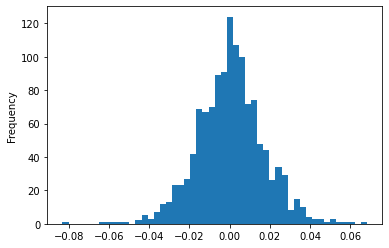

In [58]:
walmex["return"].plot.hist(bins=50);

In [59]:
walmex["return"].mean().round(6)

0.000494

Supongamos que ahora, alguien nos pregunta qué cuál es el rendimiento promedio de las acciones de walt-mart México.

Note que nosotros tenemos una muestra, los datos del año 2017.

La población total, o los datos completos serían los datos de todos los años que existirá walmart de México, los años pasados y futuros.

Nos gustaria construir un intervalo de confianza del 95% para el precio de las acciones de walmart

Recuerde que si el intervalo de confianza al 95% de confianza es

IC(95%) = media +- 1.96 SE 



In [72]:
media = walmex["return"].mean()
desv_est = walmex["return"].std(ddof=1)

In [73]:
limite_superior = media+(1.96*desv_est)
limite_inferior = media-(1.96*desv_est)

In [74]:
limite_inferior.round(3), limite_superior.round(3)

(-0.032, 0.033)

Ahora nos gustaria probar la hipótesis de que el rendimiento de las acciones de walmart es 0.0006 

$H_0: \mu=0.0006$

$H_a: \mu \neq 0.0006$


In [77]:
media_h0 = 0.0006
n = 1250
raiz_n = n ** 0.5

In [76]:
walmex.value_counts("return")

return
 0.000000    8
 0.008190    2
 0.006898    1
 0.006880    1
 0.006877    1
            ..
-0.005670    1
-0.005716    1
-0.005749    1
-0.005753    1
 0.068265    1
Length: 1250, dtype: int64

In [78]:
estadistico_prueba = (media - media_h0) / (desv_est/ raiz_n)

In [79]:
estadistico_prueba

-0.22558701253149557

No se rechaza h0, 0.0006 es un valor posible del verdadero rendimiento promedio de la acción de Walmex

p-value es el nivel de signifancia exacto de la prueba de hipótesis 

In [ ]:
from scipy.stats import norm

In [ ]:
prob_ztest = norm.cdf(z_test).round(2)
## como es una prueba de 2 colas el p-value es 2 veces
## prob_ztest
p_value = 2 * prob_ztest

Regla de decisión: si el **p-valor**$ < \alpha $ entonces rechazar $H_0$.